# LABORATORIO 2

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
import panel as pn
import plotly.graph_objects as go
import pandas as pd
pn.extension('plotly')

# 1. Entender el contenido de los archivos de datos


## 1.1  Carga de archivos

Para abordar el análisis, se tomara información de los cortes 20211, 20202 y 20201 de la base de datos del ICFES. La selección inicial de variables se hace usando el diccionario brindado por el ICFES para entender la base de datos y se obtiene un total de 29 varaibles de las 77. Las variables escogidas inicialmente, organizadas por categoría son:  
* Estudiante  
>ESTU_CONSECUTIVO (se usa como llave de la tabla)  
    ESTU_DEPTO_RESIDE   
    PERIODO  
    ESTU_TIENEETNIA  
* Familia  
>FAMI_ESTRATOVIVIENDA 
    FAMI_SITUACIONECONOMICA  
    FAMI_TIENEINTERNET  
    FAMI_EDUCACIONPADRE  
    FAMI_EDUCACIONMADRE  
    FAMI_TRABAJOLABORPADRE  
    FAMI_TRABAJOLABORMADRE
* Colegio  
>COLE_CALENDARIO  
    COLE_JORNADA  
    COLE_NATURALEZA  
    COLE_DEPTO_UBICACION  
    COLE_BILINGUE  
    COLE_CARACTER  
* Resultados  
>PERCENTIL_GLOBAL  
    PERCENTIL_LECTURA_CRITICA  
    PERCENTIL_MATEMATICAS  
    PERCENTIL_C_NATURALES  
    PERCENTIL_SOCIALES_CIUDADANAS  
    PERCENTIL_INGLES  
    PUNT_LECTURA_CRITICA  
    PUNT_MATEMATICAS  
    PUNT_C_NATURALES  
    PUNT_SOCIALES_CIUDADANAS  
    PUNT_INGLES  
    PUNT_GLOBAL  

Ahora se procede a cargar los datos, seleccionar las variables mencionadas anteriormente y análizarlas de una manera para validar si se puede eliminar alguna adicional

In [2]:
data_20201 = pd.read_csv("archivos/SB11_20201.txt", engine="python", sep = '\¬', header=0, encoding='utf-8-sig')
data_20202 = pd.read_csv("archivos/SB11_20202.txt", engine="python", sep = '\¬', header=0, encoding='utf-8-sig')
data_20211 = pd.read_csv("archivos/SB11_20211.txt", engine="python", sep = '\¬', header=0, encoding='utf-8-sig')

data = pd.concat([data_20201,data_20202,data_20211],join="inner")#tipo inner para eliminar variables que solo estan en 202101
data = data[['ESTU_CONSECUTIVO', 'PERIODO', 'ESTU_DEPTO_RESIDE', 'ESTU_TIENEETNIA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_SITUACIONECONOMICA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'COLE_CALENDARIO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'COLE_BILINGUE', 'COLE_CARACTER', 'PERCENTIL_GLOBAL', 'PERCENTIL_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS', 'PERCENTIL_C_NATURALES', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_INGLES', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']]
data.head()

,ESTU_CONSECUTIVO,PERIODO,ESTU_DEPTO_RESIDE,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,...,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
0,SB11202010045555,20201,CESAR,No,Estrato 1,Mejor,No,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia",...,4,6,1,7.0,39,32,35,24,36.0,164
1,SB11202010045719,20201,NARIÑO,No,NaN,NaN,NaN,NaN,NaN,NaN,...,12,10,23,3.0,41,41,39,44,30.0,202
2,SB11202010070662,20201,CAUCA,Si,Estrato 1,Igual,No,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,"Trabaja en el hogar, no trabaja o estudia",...,7,4,1,3.0,37,36,33,24,30.0,162
3,SB11202010069926,20201,PUTUMAYO,No,Estrato 1,Igual,Si,Técnica o tecnológica completa,Educación profesional completa,"Es dueño de un negocio grande, tiene un cargo ...",...,13,10,7,8.0,38,42,38,33,37.0,188
4,SB11202010023181,20201,RISARALDA,No,Estrato 6,Igual,Si,Educación profesional completa,Secundaria (Bachillerato) completa,"Trabaja como profesional (por ejemplo médico, ...",...,25,32,42,80.0,58,50,50,53,80.0,274


In [3]:
data.shape

(535835, 28)

## 1.2 Validación de Nulos
A continación se valida el Nombre, tipo de columna y cantida de nulos

In [4]:
#Nombre, tipo de columna y cantidad de nulos
types = data.dtypes.tolist()
columns = data.columns.tolist()
nulls = data.isnull().sum()
all_cols = []
for i in range(len(columns)):
    all_cols.append((columns[i],types[i],nulls[i]))
pd.DataFrame(all_cols, columns = ['nombre_columna','Tipo','Cantidad_Nulos']).sort_values(by=['Cantidad_Nulos'],ascending=False)

,nombre_columna,Tipo,Cantidad_Nulos
14,COLE_BILINGUE,object,88177
9,FAMI_TRABAJOLABORPADRE,object,21706
10,FAMI_TRABAJOLABORMADRE,object,19614
4,FAMI_ESTRATOVIVIENDA,object,19266
5,FAMI_SITUACIONECONOMICA,object,18336
6,FAMI_TIENEINTERNET,object,15874
15,COLE_CARACTER,object,15844
8,FAMI_EDUCACIONMADRE,object,15726
7,FAMI_EDUCACIONPADRE,object,15223
3,ESTU_TIENEETNIA,object,5448


## 1.3 Tratamiento de Nulos
Por la cantidad de nulos, se decide descartar la variable de colegio Bilingüe ya que cprresponde al 16.45% de los datos. Adicional se eliminan las variables de trabajo del padre y de la madre ya que tienen una alta cantidad de nulos y se decide trabajar solo con las variables de estudio máximo alcanzado de los mismos. Cómo úlitma variable a eliminar en esta etapa se escoge el departamento de ubicación del colegio ya que esta relacionadad con el deptartamento de residencia del estudiante. Para finalizar, se imputan los faltantes de la variable tiene etnia suponiendo que el no contestar la pregunta es lo mismo que no tener y posteriormente se eliminan todos los registros con luego de haber realizado lo anterior, sigan con valores nulos.

In [5]:
data_select = data[['ESTU_CONSECUTIVO','PERIODO', 'ESTU_DEPTO_RESIDE', 'ESTU_TIENEETNIA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_SITUACIONECONOMICA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'COLE_CALENDARIO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'COLE_CARACTER', 'PERCENTIL_GLOBAL', 'PERCENTIL_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS', 'PERCENTIL_C_NATURALES', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_INGLES', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']]
data_select = data_select.fillna({'ESTU_TIENEETNIA':"No"})
data_select = data_select.dropna().set_index('ESTU_CONSECUTIVO',)
data_select.shape

(494088, 24)

Para finalizar, se tienen un total de 24 variables y 494088 registros. En comparación con la cantidad de registros incial, se eliminó un 7.791% ya que se consideró preferible hacer esto, a imputar de manera errónea variables catégóricas pueden afectar el análisis que se realizará mas adelante. Las variables al final de esta etapa son:  

* Estudiante  
>ESTU_DEPTO_RESIDE   
    PERIODO  
    ESTU_TIENEETNIA  
* Familia  
>FAMI_ESTRATOVIVIENDA 
    FAMI_SITUACIONECONOMICA  
    FAMI_TIENEINTERNET  
    FAMI_EDUCACIONPADRE  
    FAMI_EDUCACIONMADRE  
* Colegio  
>COLE_CALENDARIO  
    COLE_JORNADA  
    COLE_NATURALEZA  
    COLE_CARACTER  
* Resultados - Variables a explicar a partir de las anteriores
>PERCENTIL_GLOBAL  
    PERCENTIL_LECTURA_CRITICA  
    PERCENTIL_MATEMATICAS  
    PERCENTIL_C_NATURALES  
    PERCENTIL_SOCIALES_CIUDADANAS  
    PERCENTIL_INGLES  
    PUNT_LECTURA_CRITICA  
    PUNT_MATEMATICAS  
    PUNT_C_NATURALES  
    PUNT_SOCIALES_CIUDADANAS  
    PUNT_INGLES  
    PUNT_GLOBAL

# 2. Identificar características y relaciones en las variables
Con las variables seleccionadas anteriormente, se procederá a realizar un análisis de entrada, para revisar el comportamiento de cada una de estas y como se relacionan entre si

## 2.1 Análisis Variables Numéricas  
Se sabe que el puntaje global se calcula al partir del puntaje obtenido en cada area de evaluación, lo que implica que hay una alta correlación entre las las varaibles de puntaje global y puntaje por area. Por esta razón, solo se analizará la variable de puntaje global y se usara a lo largo del análisis como la varaible a explicar. Sin embargo, las varaibles por area se mantienen en caso de que se requiera realizar un análisis puntual sobre un área específico.

Primero se pesentan los estadísticos descriptivos mas comunes la variable puntaje global y su histograma.

In [6]:
data_select[['PUNT_GLOBAL',]].describe()

,PUNT_GLOBAL
count,494088.000000
mean,252.181761
std,50.299609
min,0.000000
25%,213.000000
50%,248.000000
75%,287.000000
max,500.000000


C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


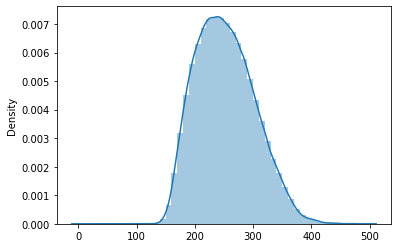

In [7]:
sns.distplot(data_select[['PUNT_GLOBAL']],hist=True)

Sobre la puntuación global, se puede observar que su media esta en 252.1817 puntos y que el percentil 75 esta en 287 puntos. Lo que implica que menos de la cuarta parte de los estudiantes que presetnaron el examen durante los periodos 20201 y 20211 obtuvieron un puntaje igula o spuerior a 300/500. Además pareciera que sigue una distribución normal, aunque bastante concentrada al rededor de la media y con una leve desviación hacia la izquierda de esta. Realizamos un anális de asimetría y curtosis para validar esto.
  

In [8]:
asimetría = data_select[['PUNT_GLOBAL']].skew()
kurtosis = data_select[['PUNT_GLOBAL']].kurt()
{"Asimetria":asimetría,"Kurtosis":kurtosis}

{'Asimetria': PUNT_GLOBAL    0.383152
 dtype: float64,
 'Kurtosis': PUNT_GLOBAL   -0.265857
 dtype: float64}

Según la asimetría obtenida, la varaible puntaje global efectivamente tiene un sesgo hacia la izquierda y la prueba de curtosis, nos dice que es mas achatada que una distribución normal.  

## 2.2 Análisis Variables Categóricas
A continuación se procede a analizar las variables categóricas seleccionadas previamente, se presentaran estadísiticos descriptivos y gráficos de barras organizados por la categoría con mayor cantidad de estudiantes.

In [9]:
data_select.describe(include=[object])

,ESTU_DEPTO_RESIDE,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,COLE_CALENDARIO,COLE_JORNADA,COLE_NATURALEZA,COLE_CARACTER
count,494088,494088,494088,494088,494088,494088,494088,494088,494088,494088,494088
unique,34,2,7,3,2,12,12,3,6,2,4
top,BOGOTÁ,No,Estrato 2,Igual,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,A,MAÑANA,OFICIAL,ACADÉMICO
freq,78454,464998,179153,295313,351991,118356,134922,469129,194587,367359,268647


Text(0.5, 1.0, 'COLE_CARACTER')

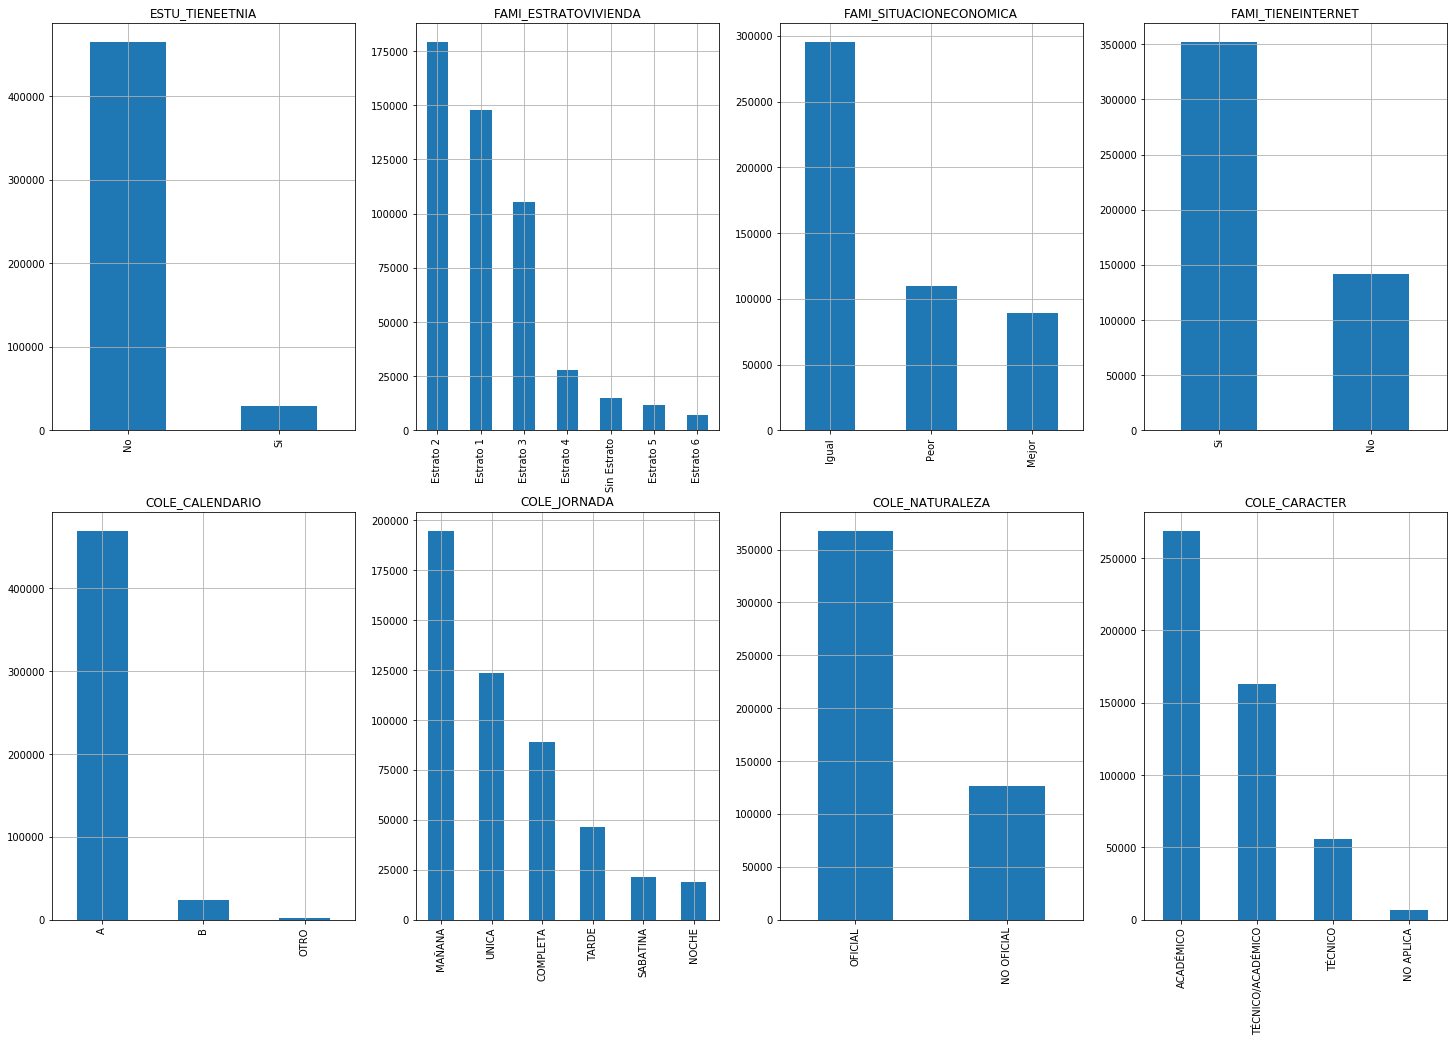

In [10]:
fig, axes = plt.subplots(figsize=(25,16.5),nrows=2, ncols=4)
data_select['ESTU_TIENEETNIA'].value_counts().plot(ax=axes[0,0], kind='bar', grid=True)
axes[0, 0].set_title('ESTU_TIENEETNIA')
data_select['FAMI_ESTRATOVIVIENDA'].value_counts().plot(ax=axes[0,1], kind='bar', grid=True)
axes[0, 1].set_title('FAMI_ESTRATOVIVIENDA')
data_select['FAMI_SITUACIONECONOMICA'].value_counts().plot(ax=axes[0,2], kind='bar', grid=True)
axes[0, 2].set_title('FAMI_SITUACIONECONOMICA')
data_select['FAMI_TIENEINTERNET'].value_counts().plot(ax=axes[0,3], kind='bar', grid=True)
axes[0, 3].set_title('FAMI_TIENEINTERNET')
data_select['COLE_CALENDARIO'].value_counts().plot(ax=axes[1,0], kind='bar', grid=True)
axes[1, 0].set_title('COLE_CALENDARIO')
data_select['COLE_JORNADA'].value_counts().plot(ax=axes[1,1], kind='bar', grid=True)
axes[1, 1].set_title('COLE_JORNADA')
data_select['COLE_NATURALEZA'].value_counts().plot(ax=axes[1,2], kind='bar', grid=True)
axes[1, 2].set_title('COLE_NATURALEZA')
data_select['COLE_CARACTER'].value_counts().plot(ax=axes[1,3], kind='bar', grid=True)
axes[1, 3].set_title('COLE_CARACTER')

Text(0.5, 1.0, 'FAMI_EDUCACIONMADRE')

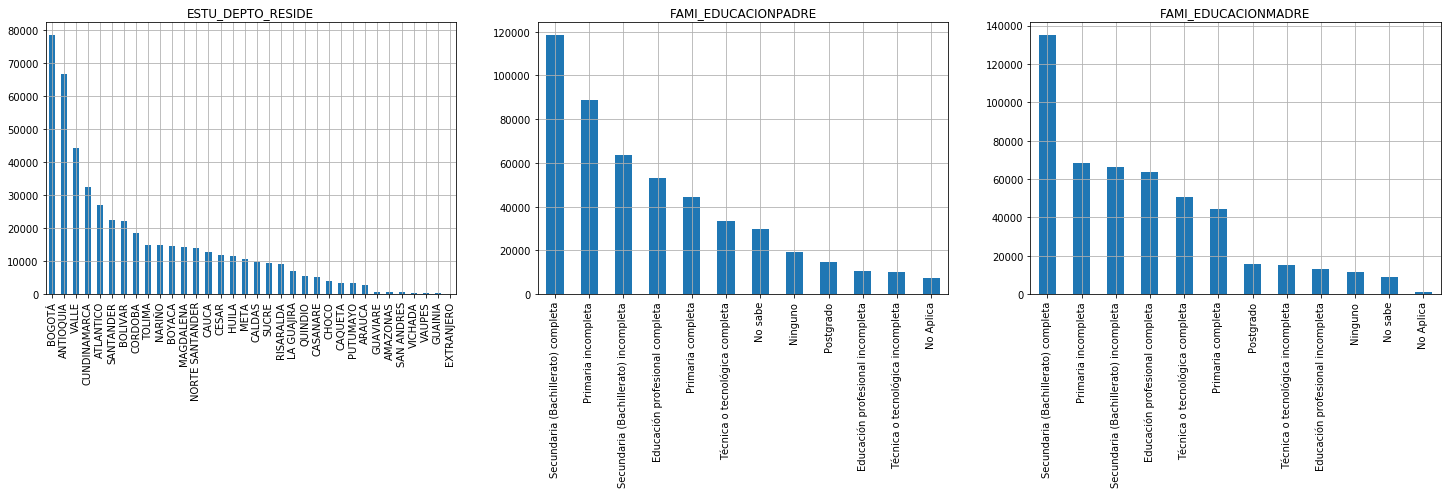

In [11]:
fig, axes = plt.subplots(figsize=(25,5),nrows=1, ncols=3)
data_select['ESTU_DEPTO_RESIDE'].value_counts().plot(ax=axes[0], kind='bar', grid=True)
axes[0].set_title('ESTU_DEPTO_RESIDE')
data_select['FAMI_EDUCACIONPADRE'].value_counts().plot(ax=axes[1], kind='bar', grid=True)
axes[1].set_title('FAMI_EDUCACIONPADRE')
data_select['FAMI_EDUCACIONMADRE'].value_counts().plot(ax=axes[2], kind='bar', grid=True)
axes[2].set_title('FAMI_EDUCACIONMADRE')

De los histogramas se puede observar que la mayor cantidad de estudiantes se ubican en los estratos 1, 2 y 3, estudian en colegios oficiales, pertenencen a calendario A, su situación económica con respecto al año anterior es la misma y residen en Bogotá, Antioquia y Valle. De cara a la educación de los padres, predomina la finalización de la Secuandaria.

## 2.3 Análisis de Relación entre Numéricas y Categóricas.
Al igual que en el análisis de las variables categóricas, de las variables númericas solo se tomará el puntaje global. Para compararlo se realizarán agrupaciones de las categorías de las variables que se consideren mas influyentes. Adiocionalmente se presenteran boxplots de todas las categóricas para observar su comportamiento por categoría.

**Relación entre Puntuación Global y Estrato de la vivienda**

In [12]:
data_select[['PUNT_GLOBAL','FAMI_ESTRATOVIVIENDA']].groupby(['FAMI_ESTRATOVIVIENDA'],as_index=True).describe()

PUNT_GLOBAL                                              \
                           count        mean        std    min    25%    50%   
FAMI_ESTRATOVIVIENDA                                                           
Estrato 1               147819.0  237.430614  43.226479    0.0  205.0  233.0   
Estrato 2               179153.0  251.258578  45.852859   23.0  217.0  249.0   
Estrato 3               105269.0  264.318869  49.449551   57.0  227.0  264.0   
Estrato 4                28038.0  282.179364  59.531461  104.0  237.0  288.0   
Estrato 5                11505.0  293.652151  64.227980  128.0  248.0  305.0   
Estrato 6                 7259.0  301.832346  66.615305  128.0  260.0  318.0   
Sin Estrato              15045.0  211.611898  40.980478   72.0  182.0  203.0   

                                    
                        75%    max  
FAMI_ESTRATOVIVIENDA                
Estrato 1             266.0  500.0  
Estrato 2             283.0  500.0  
Estrato 3             300.0  476.0  
Estrato 4             327.0  492.0  
Estrato 5             343.0  479.0  
Estrato 6             351.0  495.0  
Sin Estrato           232.0  434.0

**Relación entre Puntuación Global y Situación Económica**

In [13]:
data_select[['PUNT_GLOBAL','FAMI_SITUACIONECONOMICA']].groupby(['FAMI_SITUACIONECONOMICA'],as_index=True).describe()

PUNT_GLOBAL                                      \
                              count        mean        std   min    25%   
FAMI_SITUACIONECONOMICA                                                   
Igual                      295313.0  251.480785  49.547474  23.0  213.0   
Mejor                       88972.0  244.400733  51.096008  57.0  204.0   
Peor                       109803.0  260.371893  50.489434   0.0  222.0   

                                              
                           50%    75%    max  
FAMI_SITUACIONECONOMICA                       
Igual                    247.0  285.0  500.0  
Mejor                    240.0  279.0  476.0  
Peor                     258.0  295.0  500.0

**Relación entre Puntuación Global y Naturaleza del Colegio**

In [14]:
data_select[['PUNT_GLOBAL','COLE_NATURALEZA']].groupby(['COLE_NATURALEZA'],as_index=True).describe()

PUNT_GLOBAL                                              \
                      count        mean        std    min    25%    50%   
COLE_NATURALEZA                                                           
NO OFICIAL         126729.0  280.084353  54.461002  123.0  240.0  282.0   
OFICIAL            367359.0  242.556115  44.926971    0.0  208.0  240.0   

                               
                   75%    max  
COLE_NATURALEZA                
NO OFICIAL       320.0  495.0  
OFICIAL          273.0  500.0

De los descriptivos, se puede observar que el puntaje aumenta a medida que lo hace el estrato, aunque disminuye la cantidad de estudiantes por estrato. Sin embargo, los puntajes perfectos solo se encuentran en los estratos 1 y 2. En la comparación puntaje global vs situación económica es muy curioso que los estudiantes con peor situación sean los que presentan una mejor media y percentil 75 que las otras dos categorías. A continuación se presentan los boxplots de las variables categóricas

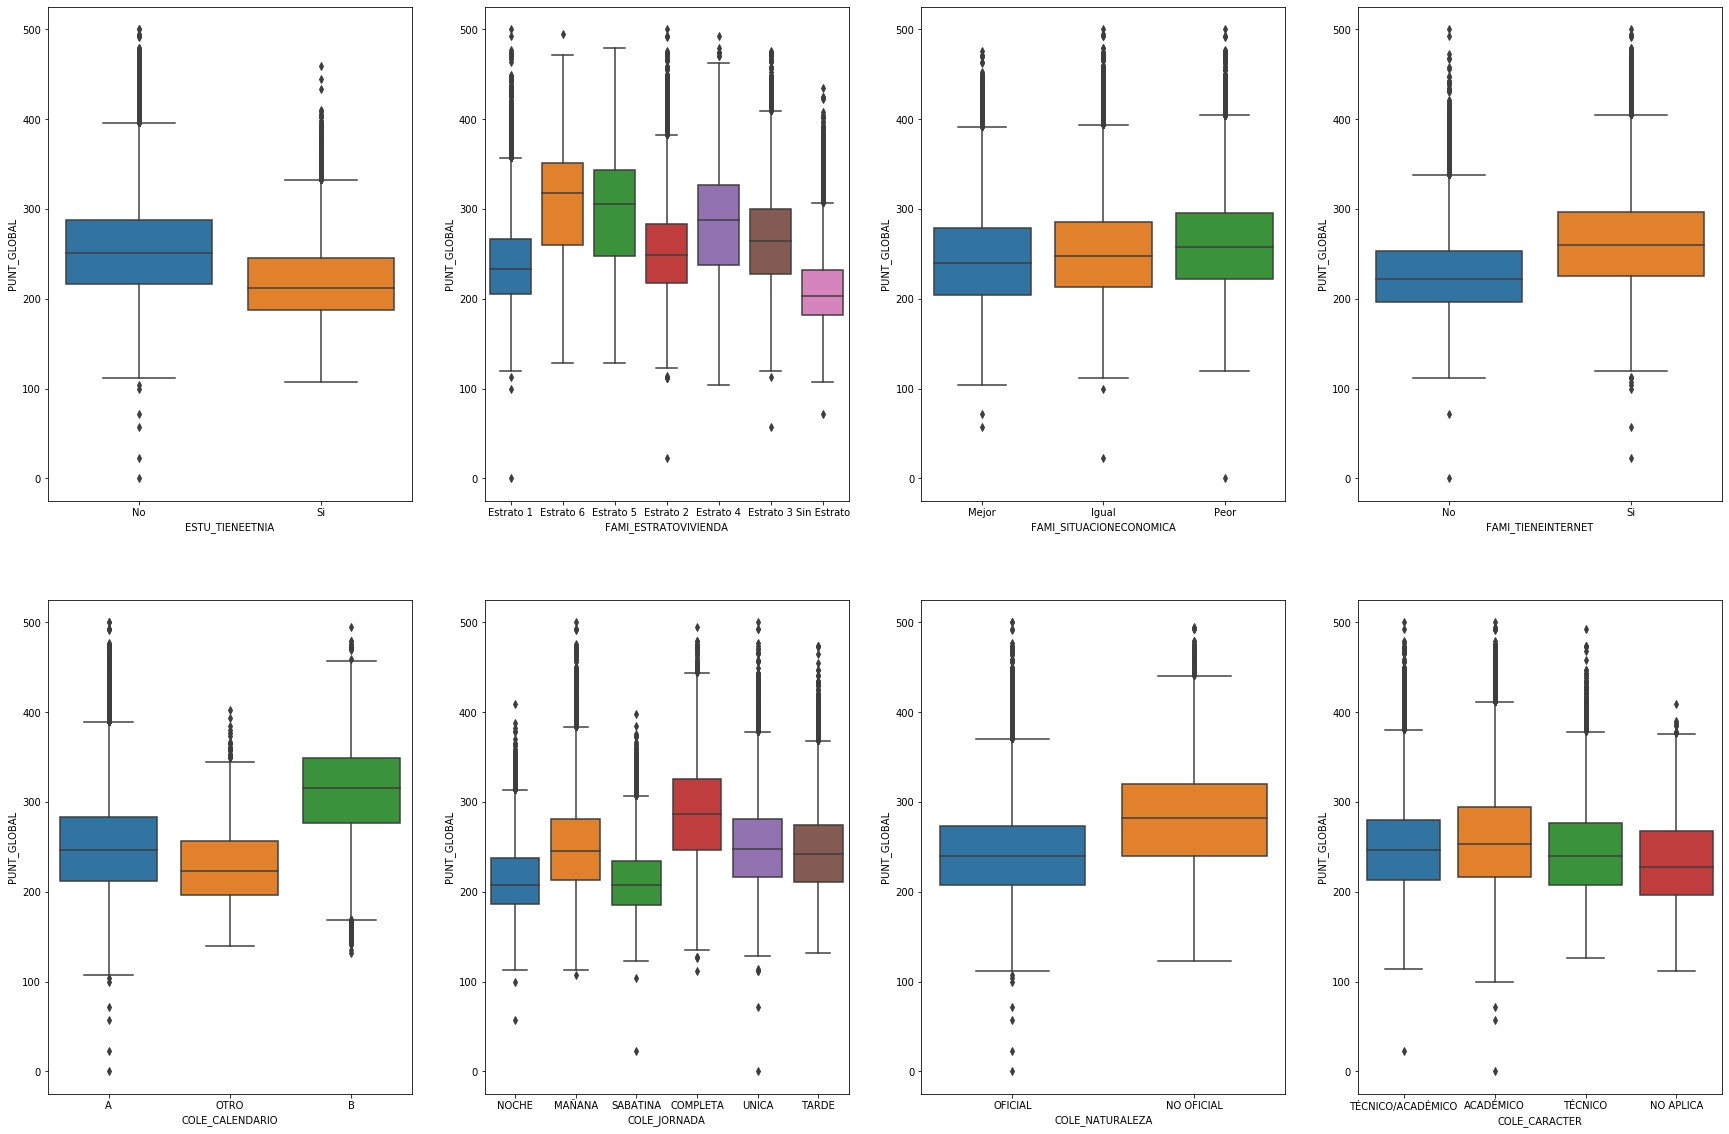

In [15]:
f, axes = plt.subplots(2, 4,figsize=(30,20))
sns.boxplot(  y="PUNT_GLOBAL", x= "ESTU_TIENEETNIA", data=data_select,  ax=axes[0,0])
sns.boxplot(  y="PUNT_GLOBAL", x= "FAMI_ESTRATOVIVIENDA", data=data_select,  ax=axes[0,1])
sns.boxplot(  y="PUNT_GLOBAL", x= "FAMI_SITUACIONECONOMICA", data=data_select,  ax=axes[0,2])
sns.boxplot(  y="PUNT_GLOBAL", x= "FAMI_TIENEINTERNET", data=data_select,  ax=axes[0,3])
sns.boxplot(  y="PUNT_GLOBAL", x= "COLE_CALENDARIO", data=data_select,  ax=axes[1,0])
sns.boxplot(  y="PUNT_GLOBAL", x= "COLE_JORNADA", data=data_select,  ax=axes[1,1])
sns.boxplot(  y="PUNT_GLOBAL", x= "COLE_NATURALEZA", data=data_select,  ax=axes[1,2])
sns.boxplot(  y="PUNT_GLOBAL", x= "COLE_CARACTER", data=data_select,  ax=axes[1,3])

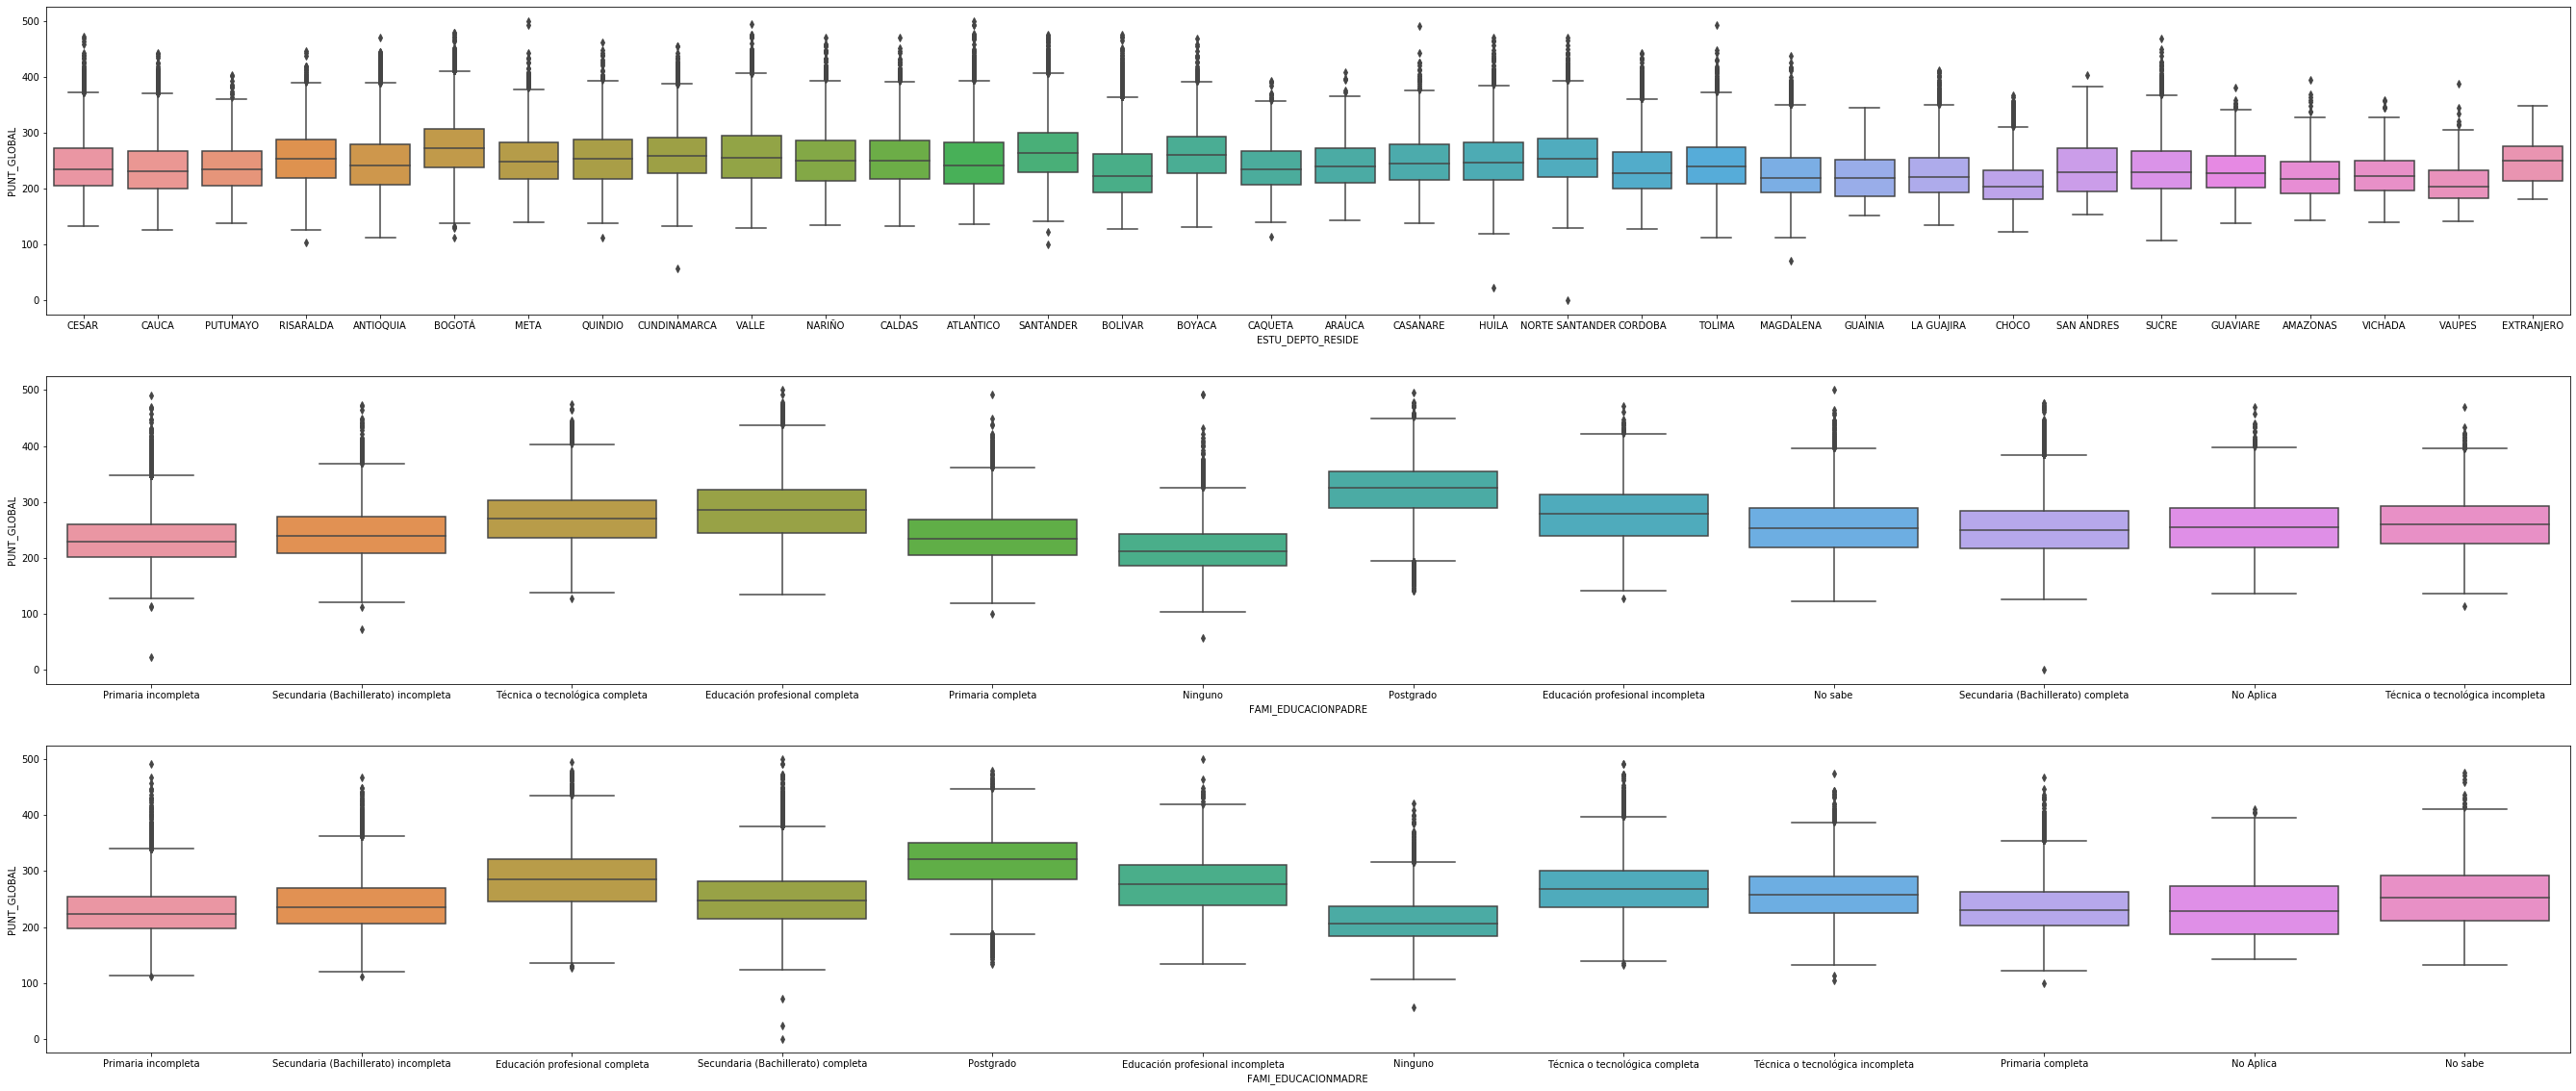

In [16]:
f, axes = plt.subplots(3, 1,figsize=(47,20))
sns.boxplot(  y="PUNT_GLOBAL", x= "ESTU_DEPTO_RESIDE", data=data_select,  ax=axes[0])
sns.boxplot(  y="PUNT_GLOBAL", x= "FAMI_EDUCACIONPADRE", data=data_select,  ax=axes[1])
sns.boxplot(  y="PUNT_GLOBAL", x= "FAMI_EDUCACIONMADRE", data=data_select,  ax=axes[2])

De los Boxplots, se puede observar que variables afectan el puntaje global según sus categorías o no. Para esto, se compara la media entre las diferentes categorías, sin embargo, es necesario tener en cuenta que las diferentes categorías de las variables no estan distribuídas de forma equitativa (no tienen la misma cantida de datos) lo que pued afectar su análisis. Las variables que se consideran, afectan el puntaje global son: ESTU_DEPTO_RESIDE, ESTU_TIENEETNIA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, COLE_CALENDARIO, COLE_JORNADA, COLE_NATURALEZA.

## 2.4 Matriz de Correlación
Para calcular la matriz de correlación, se transforman las variables categóricasen variables dummies, eliminando siempre una de las categorías de cada variable para evitar colinealidad. Se descarta la variable departamento de residencia ya que generaría 34 variables dummies adicionales aunque se usará para analizar los datos mas adelante. A continuación se persenta un mapa de calor de la matriz de correlación, con sus valores respectivos: 

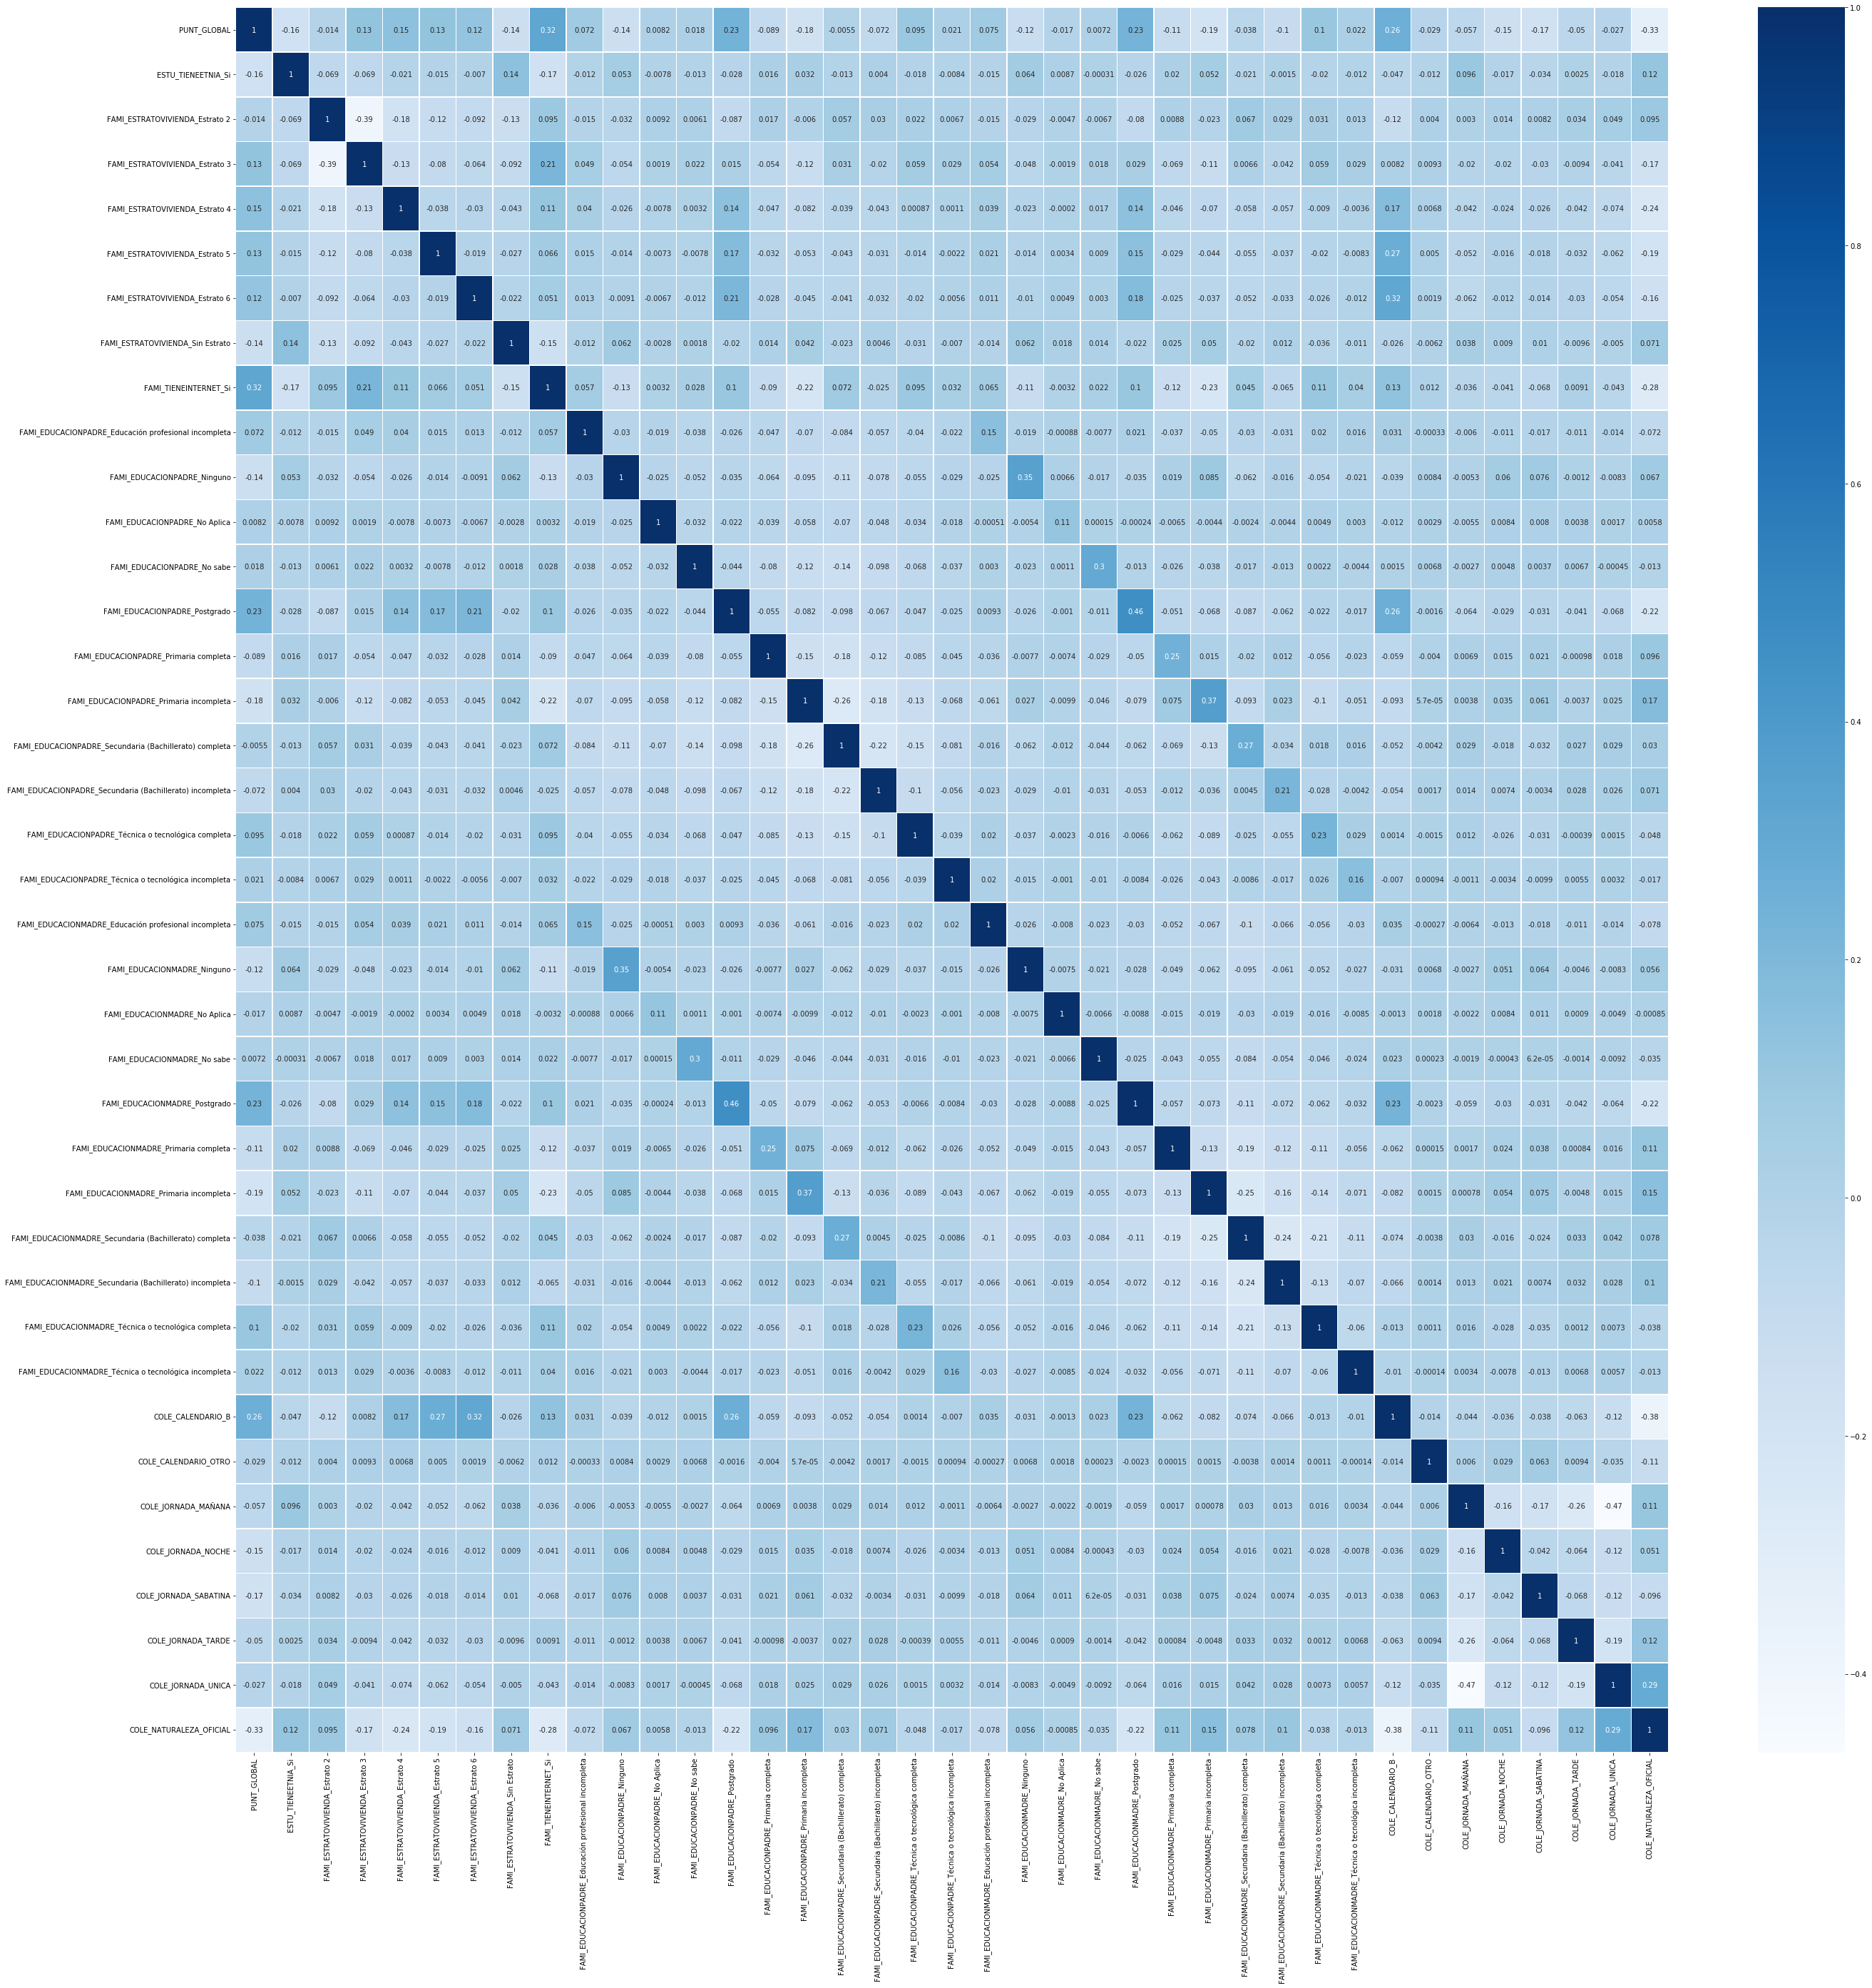

In [17]:
data_corr =data_select[['ESTU_TIENEETNIA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'COLE_CALENDARIO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'PUNT_GLOBAL']]
data_corr_dummies = pd.get_dummies(data_corr,drop_first=True)

corrMatrix = data_corr_dummies.corr()
fig, ax = plt.subplots(figsize=(45,45))    
sns.heatmap(corrMatrix, cmap="Blues", annot=True, linewidths=.5)

Luego de generar la matriz de correlación, se puede obvservar que entre las varialbes catgóricas no hay poca correlaciones muy altas, lo que puede evita problemas de colinealidad. Sin embargo, entre variables categóricas y variable objetivo la correlación tampoco es muy alta, máximo de -0.33. Cómo cada una de las variables categóricas tiene por lo menos una categoría con una correlación mayor o igual a 0.15 se dejan todas las variables para la construcción del modelo. Es decir: ESTU_DEPTO_RESIDE, ESTU_TIENEETNIA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, COLE_CALENDARIO, COLE_JORNADA, COLE_NATURALEZA.

## 2.5 Preguntas Resultantes del Análisis de Entrada

Luego de realizar el análisis de entrada, surgen las siguientes preguntas que se pueden abordara partir de los datos:

**1.** ¿El estrato de la vivienda afecta significativamente en los resultados de las pruebas saber 11?  
**2.** ¿Es relevante, sobre los resultados globales de las pruebas saber 11, el hecho de residir en un departamento principal?  
**3.** ¿Hay relación entre las variables relacionadas con el colegio (calendario, naturaleza, jornada y caracter) y los  resultados entre los puntajes globales?

# 3. Abordar preguntas de negocio planteadas
ESTU_DEPTO_RESIDE, ESTU_TIENEETNIA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, COLE_CALENDARIO, COLE_JORNADA, COLE_NATURALEZA.
La pregunta de negocio a abordar en este punto es: ¿Es posible explicar el resultado de las pruebas saber 11 a partir de las variables socio-demograficas de los estudiantes que presentaron la prueba?

Para abordar la pregunta, se contruíran 3 modelos, uno incluyendo todas las varialbes finalistas del punto aterior, uno eliminando el estrato de la vivienda y uno solo con el estrato de la vivienda

## 3.1 Modelos de Regresión Lineal

### 3.1.1 DataSet de Prueba y de Entrenamiento
Se escoge el 30% de registros del dataset como dataset de prueba y el 70% restante como dataset de entrenamiento

In [18]:
def dividir_datos(df):
    tupla = (df.iloc[:, 1:], df.iloc[:, 0])
    X_train, X_test, y_train, y_test = train_test_split(tupla[0], tupla[1], test_size=0.3, random_state = 0)
    return(X_train, X_test, y_train, y_test)
data_set_train_test = dividir_datos(data_corr_dummies)

### 3.1.2 Modelo Completo

In [19]:
y = data_set_train_test[2]
x = data_set_train_test[0]
x = sm.add_constant(x)
model_full = sm.OLS(y,x)
model_full = model_full.fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     4193.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:06:20   Log-Likelihood:            -1.7806e+06
No. Observations:              345861   AIC:                         3.561e+06
Df Residuals:                  345822   BIC:                         3.562e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

### 3.1.3 Modelo Solo con el Estrato de la Vivienda

In [20]:
y = data_set_train_test[2]
x = data_set_train_test[0][['FAMI_ESTRATOVIVIENDA_Estrato 2', 'FAMI_ESTRATOVIVIENDA_Estrato 3', 'FAMI_ESTRATOVIVIENDA_Estrato 4','FAMI_ESTRATOVIVIENDA_Estrato 5', 'FAMI_ESTRATOVIVIENDA_Estrato 6', 'FAMI_ESTRATOVIVIENDA_Sin Estrato']]
x = sm.add_constant(x)
model1 = sm.OLS(y,x)
model1 = model1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     6997.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:06:20   Log-Likelihood:            -1.8264e+06
No. Observations:              345861   AIC:                         3.653e+06
Df Residuals:                  345854   BIC:                         3.653e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### 3.1.4 Modelo Con estrato de vivienda + variables adicionales.
Para este punto, se calcularan varios modelos añadiendo variables al estrato de vivienda, con el fin de obtener un R^2 ajustado mejor que el del modelo solo con el estrato de vivienda. Solo se presentará el que se considere como el mejor modelo de los revisados

In [21]:
X = data_set_train_test[0][['FAMI_ESTRATOVIVIENDA_Estrato 2', 'FAMI_ESTRATOVIVIENDA_Estrato 3', 'FAMI_ESTRATOVIVIENDA_Estrato 4','FAMI_ESTRATOVIVIENDA_Estrato 5', 'FAMI_ESTRATOVIVIENDA_Estrato 6', 'FAMI_ESTRATOVIVIENDA_Sin Estrato','COLE_NATURALEZA_OFICIAL','FAMI_TIENEINTERNET_Si','ESTU_TIENEETNIA_Si']]
X = sm.add_constant(X)
model2 = sm.OLS(endog=data_set_train_test[2], exog=X )
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     9375.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:06:21   Log-Likelihood:            -1.8084e+06
No. Observations:              345861   AIC:                         3.617e+06
Df Residuals:                  345851   BIC:                         3.617e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### 3.1.5 Comparación de los Modelos
De los 3 modelos presentados, el que presenta un mejor R^2 ajustado es el completo con 0.315, que de por si es bastante malo. A medida que se van quitando vairiables el R^2 comienza a disminuir lo cual nos lleva a quedarnos con el modelo full. Sin embargo, aunque la cantiadad de variables que usa para explicar el puntaje global en este modelo es de 8, al convertirlas en variables dummies es de 37 y tiendo en cuenta que se plantea como propósito del ejercicio explicar el puntaje global, 37 variables pueden complicar bastante este proceso. Por lo anterior, se puede concluír que unicamente las variables socio demográficas no influyen sobre el puntaje global de las pruebas saber. Varldía la pena revisar su otro tipo de variables como la cantidad de horas dedicas al día a leer o a internet afecta el resultado de la regresión, aunque estas no son sociodemográficas.

# 4. Desarrollar una herramienta interactiva de análisis


A continuación se presenta una interfaz en la cuál se pueden comparar algunas variables con el puntaje global

In [22]:
titulo = '# Herramienta Interactiva de Análisis - Puntaje Global Prueba Saber 11'

def valores_filtro_columna(columna):
    columna = columna.astype(str)  
    valores = columna.unique().tolist()
    valores = sorted(valores)           
    return valores 

sel_estrato = valores_filtro_columna(data_select["FAMI_ESTRATOVIVIENDA"])
sel_etnia = valores_filtro_columna(data_select["ESTU_TIENEETNIA"])
sel_tiene_internet = valores_filtro_columna(data_select["FAMI_TIENEINTERNET"])
sel_cole_cal = valores_filtro_columna(data_select["COLE_CALENDARIO"])
sel_cole_jor = valores_filtro_columna(data_select["COLE_JORNADA"])
sel_cole_nat = valores_filtro_columna(data_select["COLE_NATURALEZA"])

seleccion_est = pn.widgets.Select(name='Estrato de la Vivienda', options= sel_estrato)
seleccion_et = pn.widgets.Select(name='Tiene Etnia', options= sel_etnia)
seleccion_tiene_int = pn.widgets.Select(name='Tiene Internet', options= sel_tiene_internet)
seleccion_cole_cal = pn.widgets.Select(name='Calendario Colegio', options= sel_cole_cal)
seleccion_cole_jor = pn.widgets.Select(name='Jornada Colegio', options= sel_cole_jor)
seleccion_cole_nat = pn.widgets.Select(name='Naturaleza Colegio', options= sel_cole_nat)


@pn.depends(seleccion_est.param.value, seleccion_et.param.value, seleccion_tiene_int.param.value, seleccion_cole_cal.param.value, seleccion_cole_jor.param.value, seleccion_cole_nat.param.value)

def filtrar_num_dep(seleccion_est, seleccion_et, seleccion_tiene_int, seleccion_cole_cal, seleccion_cole_jor, seleccion_cole_nat):
    datos = data_select
    filtrar_lista = [a and b and c and d and e and f for a,b,c,d,e,f in zip(
                                                        datos['FAMI_ESTRATOVIVIENDA'] == seleccion_est, 
                                                        datos['ESTU_TIENEETNIA'] == seleccion_et,
                                                        datos['FAMI_TIENEINTERNET'] == seleccion_tiene_int,
                                                        datos['COLE_CALENDARIO'] == seleccion_cole_cal,
                                                        datos['COLE_JORNADA'] == seleccion_cole_jor, 
                                                        datos['COLE_NATURALEZA'] == seleccion_cole_nat         
                                                     )
                    ]
    
    df_temporal = datos[filtrar_lista]
    fig1 = go.Figure(go.Histogram(x=df_temporal['ESTU_DEPTO_RESIDE']))
    fig1.update_layout( title= "Cantidad de estudiantes por departamento según categorías seleccionadas", yaxis_title="Cantidad de Estudiantes", xaxis_title="Departamento")
    return fig1

@pn.depends(seleccion_est.param.value, seleccion_et.param.value, seleccion_tiene_int.param.value, seleccion_cole_cal.param.value, seleccion_cole_jor.param.value, seleccion_cole_nat.param.value)
def filtrar_punt_dep(seleccion_est, seleccion_et, seleccion_tiene_int, seleccion_cole_cal, seleccion_cole_jor, seleccion_cole_nat):
    datos = data_select
    filtrar_lista = [a and b and c and d and e and f for a,b,c,d,e,f in zip(
                                                        datos['FAMI_ESTRATOVIVIENDA'] == seleccion_est, 
                                                        datos['ESTU_TIENEETNIA'] == seleccion_et,
                                                        datos['FAMI_TIENEINTERNET'] == seleccion_tiene_int,
                                                        datos['COLE_CALENDARIO'] == seleccion_cole_cal,
                                                        datos['COLE_JORNADA'] == seleccion_cole_jor, 
                                                        datos['COLE_NATURALEZA'] == seleccion_cole_nat         
                                                     )
                    ]
    
    df_temporal = datos[filtrar_lista]
    fig2 = go.Figure(go.Box( y=df_temporal['PUNT_GLOBAL'],x=df_temporal['ESTU_DEPTO_RESIDE']))
    fig2.update_layout( title= "Puntaje Global por departamento según categorías seleccionadas", yaxis_title="Puntaje Global", xaxis_title="Departamento")
    return fig2

tablero_control = pn.Column(titulo, pn.Row (pn.Column(pn.Row(seleccion_est, seleccion_et, seleccion_tiene_int),pn.Row(seleccion_cole_cal, seleccion_cole_jor, seleccion_cole_nat),
                                            pn.Row(filtrar_punt_dep, filtrar_num_dep))))


El funcionamiento de la herramienta es bastante simple. Se presentan 6 categorías diferentes por las que filtrar los datos para observar de manera gráfica los puntajes globales obtenidos y la cantida de estudiantes por departamento. Es necesario tener en cuenta que no se pueden observar todas las categorías de una variable al mismo tiempo. Al pasar el cursor sobre la barra o la caja, se pueden observar la cantidad que representa en caso de la barra o el valor mínimo, Q2(25%), media, Q3(75%) y valor máxmmo

In [23]:
tablero_control.servable()

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Row
                [0] Select(name='Estrato de la Vivienda', options=['Estrato 1', ...], value='Estrato 1')
                [1] Select(name='Tiene Etnia', options=['No', 'Si'], value='No')
                [2] Select(name='Tiene Internet', options=['No', 'Si'], value='No')
            [1] Row
                [0] Select(name='Calendario Colegio', options=['A', 'B', 'OTRO'], value='A')
                [1] Select(name='Jornada Colegio', options=['COMPLETA', 'MAÑANA', ...], value='COMPLETA')
                [2] Select(name='Naturaleza Colegio', options=['NO OFICIAL', 'OFICIAL'], value='NO OFICIAL')
            [2] Row
                [0] ParamFunction(function)
                [1] ParamFunction(function)

In [24]:
tablero_control.show()

Launching server at http://localhost:58580
